# 24 tm

## 텍스트 마이닝
* 자연어로 구성된 '비정형 데이터'에서 패턴 또는 관계를 추출하여 
  의미 있는 정보를 찾아내는 기법들을 의미
* 활용분야
    + 유사 단어들(또는 문서들)간의 군집 분석
    + 연관 단어의 추출 또는 단어 네트워크 분석
    + 감성 분석
    + 주요 키워드별 빈도에 따른 시각화

## 파이썬 기반 텍스트 분석 패키지
* NLTK, KoNLPy : 영어권/한국어 형태소 분석기
* Gensim : 텍스트요약에 두각을 나타냄  
  word2vec 기능도 구현되어 있음
* SpaCy : 최근에 주목받는 NLP 패키지

## NLTK
* 교육용으로 개발된 자연어 처리 및 분석 패키지
* www.nltk.org
* pip install nltk

In [1]:
# pip --trusted-host pypi.org --trusted-host files.pythonhosted.org install nltk

## English NLP

In [2]:
import nltk

In [3]:
# nltk 내장 영어 말뭉치corpus
# corpus : 분석을 위해 추출된 텍스트
nltk.download('book', quiet=True)

True

In [4]:
# 말뭉치 확인
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
texts()

text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
sents()

sent1: Call me Ishmael .
sent2: The family of Dashwood had long been settled in Sussex .
sent3: In the beginning God created the heaven and the earth .
sent4: Fellow - Citizens of the Senate and of the House of Representatives :
sent5: I have a problem with people PMing me to lol JOIN
sent6: SCENE 1 : [ wind ] [ clop clop clop ] KING ARTHUR : Whoa there !
sent7: Pierre Vinken , 61 years old , will join the board as a nonexecutive director Nov. 29 .
sent8: 25 SEXY MALE , seeks attrac older single lady , for discreet encounters .
sent9: THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset .


In [7]:
len(text1)

260819

In [8]:
text1[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [9]:
sent1

['Call', 'me', 'Ishmael', '.']

In [10]:
# 저작권이 말소된 문학작품
# 일명, 구텐베르그 말뭉치 확인
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [11]:
# 햄릿을 불러서 출력
doc = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')
doc[:300]

"[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus. Scoena Prima.\n\nEnter Barnardo and Francisco two Centinels.\n\n  Barnardo. Who's there?\n  Fran. Nay answer me: Stand & vnfold\nyour selfe\n\n   Bar. Long liue the King\n\n   Fran. Barnardo?\n  Bar. He\n\n   Fran. You come most carefully vpon "

## 텍스트 토큰화
* 문장 토큰화 : 문서에서 문장을 분리
* 단어 토큰화 : 문장에서 단어를 분리

In [12]:
# 토큰화를 위한 패키지 설치
from nltk import sent_tokenize
from nltk import word_tokenize

In [13]:
# 토큰화에 필요한 데이터 다운로드
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/hadoop/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'

In [15]:
# 문장 토큰화 : sent_tokenize(문서)
sents = sent_tokenize(text_sample)
sents   # 결과는 리스트로 저장

['The Matrix is everywhere its all around us, here even in this room.',
 'You can see it out your window or on your television.',
 'You feel it when you go to work, or go to church or pay your taxes.']

In [16]:
# 문장 토큰화 : word_tokenize(문장)
words = word_tokenize(sents[0])
words

['The',
 'Matrix',
 'is',
 'everywhere',
 'its',
 'all',
 'around',
 'us',
 ',',
 'here',
 'even',
 'in',
 'this',
 'room',
 '.']

In [17]:
# 문장토큰화한 후 단어토큰화 실시
words = []
sents = sent_tokenize(text_sample)
for sent in sents:
    words.append(word_tokenize(sent))

In [18]:
words[:1]

[['The',
  'Matrix',
  'is',
  'everywhere',
  'its',
  'all',
  'around',
  'us',
  ',',
  'here',
  'even',
  'in',
  'this',
  'room',
  '.']]

In [19]:
len(words)   # 3

3

## 불용어stopword 제거
* 분석에 큰 의미가 없는 단어를 지칭
* NLTK상에서는 stopwords 형태로 제공됨
* 하지만, 제공되는 단어수는 적음

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hadoop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
nltk.corpus.stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [22]:
# 텍스트 전처리 후 단어 토큰화 실시
stopwords = nltk.corpus.stopwords.words('english')
tokens = []

for wds in words:
    filter_words = []
    for w in wds:
        w = w.lower()   # 단어를 소문자로 변환
        if w not in stopwords:
            filter_words.append(w)
    tokens.append(filter_words)
    
tokens

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'],
 ['see', 'window', 'television', '.'],
 ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]

## 트럼프 연설문을 이용한 단어 토큰화

In [24]:
# 파일 읽기
docs = []

with open('trump_en.txt') as f:
    docs = f.read()   # 텍스트파일을 통채로 텍스트형태로 읽어옴
    
docs[:100]

'Assembly Speaker Chung, distinguished members of this Assembly, ladies and gentlemen: Thank you for '

In [25]:
# 문장/단어 토큰화
import re

sents = sent_tokenize(docs)
sents[:1]

words = []
for s in sents:
    # 알파벳 대소문자를 제외하고 모두 제거
    s = re.sub('[^a-zA-Z]', ' ', s).strip()
    words.append(word_tokenize(s))
words[:1]

[['Assembly',
  'Speaker',
  'Chung',
  'distinguished',
  'members',
  'of',
  'this',
  'Assembly',
  'ladies',
  'and',
  'gentlemen',
  'Thank',
  'you',
  'for',
  'the',
  'extraordinary',
  'privilege',
  'to',
  'speak',
  'in',
  'this',
  'great',
  'chamber',
  'and',
  'to',
  'address',
  'your',
  'people',
  'on',
  'behalf',
  'of',
  'the',
  'people',
  'of',
  'the',
  'United',
  'States',
  'of',
  'America']]

In [26]:
tokens1 = []
for wds in words:
    fwords = []
    for w in wds:
        w = w.lower()
        if w not in stopwords:
            fwords.append(w)
    tokens1.append(fwords)
tokens1[:1]

[['assembly',
  'speaker',
  'chung',
  'distinguished',
  'members',
  'assembly',
  'ladies',
  'gentlemen',
  'thank',
  'extraordinary',
  'privilege',
  'speak',
  'great',
  'chamber',
  'address',
  'people',
  'behalf',
  'people',
  'united',
  'states',
  'america']]

### 스티브잡스 스탠포드대 졸업축사 단어 토큰화 (stevejobs_en.txt)

In [27]:
# 파일 읽기
docs = []

with open('stevejobs_en.txt') as f:
    docs = f.read()   # 텍스트파일을 통채로 텍스트형태로 읽어옴
    
docs[:100]

'I am honored to be with you today at your commencement from one of the finest universities in the wo'

In [28]:
# 문장/단어 토큰화
sents = sent_tokenize(docs)
sents[:1]

words = []
for s in sents:
    s = re.sub('[^a-zA-Z]', ' ', s).strip()
    words.append(word_tokenize(s))
words[:1]

[['I',
  'am',
  'honored',
  'to',
  'be',
  'with',
  'you',
  'today',
  'at',
  'your',
  'commencement',
  'from',
  'one',
  'of',
  'the',
  'finest',
  'universities',
  'in',
  'the',
  'world']]

In [29]:
tokens2 = []
for wds in words:
    fwords = []
    for w in wds:
        w = w.lower()
        if w not in stopwords:
            fwords.append(w)
    tokens2.append(fwords)
tokens2[:1]

[['honored',
  'today',
  'commencement',
  'one',
  'finest',
  'universities',
  'world']]

## 형태소 분석
* 의미가 있는 최소의 단위로서 더 이상 분리가 불가능한 가장 작은 의미 요소
* 주어진 단어 또는 어절을 구성하는 각 형태소를 분리한 후  
  분리된 형태소의 기본형 및 품사 정보를 추출하는 것
* 문장 > 어절 > 단어 > 어근/접두사/접미사 > 품사
    + work : 동사/명사
    + working : working의 원형인 work를 추출 후 동사/명사
    + 영어의 경우 과거/현재/미래, 단수, 진행형 등에 따라 단어가 변화함
    + 보조적으로 어근추출stemming이나 원형복원lemmatizing이 필요할 수 있음

## 품사태깅POS tagging
* 단어를 문법적 기능이나 형태, 의미에 따라 구분한 것
* NLTK에서는 Penn Treebank Tagset을 이용해서 품사태깅을 함
* NNP, VB, VBP, TO, NN, DT, ADJ

In [30]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hadoop/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [31]:
from nltk.tag import pos_tag

In [32]:
# 기존 문장에 대해 품사태깅 실시
tags = pos_tag(tokens[0])
tags   # (RB부사, IN종속전치사, PRP대명사)

[('matrix', 'NN'),
 ('everywhere', 'RB'),
 ('around', 'IN'),
 ('us', 'PRP'),
 (',', ','),
 ('even', 'RB'),
 ('room', 'NN'),
 ('.', '.')]

In [33]:
## 분석에 필요한 토큰추출 - 품사가 명사인 토큰을 대상
nouns = []
for t in tokens:
    tags = pos_tag(t)
    NN = [l[0] for l in tags if l[1] == 'NN']
    nouns.append(NN)
nouns

[['matrix', 'room'], ['television'], ['feel', 'work', 'church', 'pay']]

## 트럼프 연설문 품사태깅

In [35]:
nouns1 = []
for t in tokens1:
    tags = pos_tag(t)
    NN = [w[0] for w in tags if w[1] == 'NN']
    nouns1.append(NN)
nouns1[:5]

[['speaker', 'chung', 'privilege', 'speak', 'chamber'],
 ['time', 'country', 'melania', 'welcome'],
 ['night', 'president', 'mrs'],
 ['moon', 'hospitality', 'reception', 'blue', 'house'],
 ['cooperation',
  'trade',
  'relationship',
  'principle',
  'fairness',
  'reciprocity']]

## 스티브잡스 스탠포드대 졸업축사 품사태깅

In [36]:
nouns2 = []
for t in tokens2:
    tags = pos_tag(t)
    NN = [w[0] for w in tags if w[1] == 'NN']
    nouns2.append(NN)
nouns2[:5]

[['today', 'commencement', 'finest', 'world'],
 ['college'],
 ['truth', 'college', 'graduation'],
 ['today', 'tell', 'life'],
 []]

### 단어빈도
* 텍스트 데이터의 대표단어를 알아볼수 있는 방법
* 단어별 빈도를 조사해서 알아낸 상위 n개의 단어들을 대표단어를 지정

In [72]:
from nltk import FreqDist

In [73]:
# 먼저, 기존단어들이 저장된 2차원 리스트를 1차원으로 바꿈
NNO = []
for ns in nouns:
    for n in ns:
        NNO.append(n)

In [74]:
# 단어별 빈도 파악
frqwords = FreqDist(NNO)
frqwords

FreqDist({'matrix': 1, 'room': 1, 'television': 1, 'feel': 1, 'work': 1, 'church': 1, 'pay': 1})

In [75]:
# FreqDist 좀 더 살펴보기
frqwords.N() # 7 : 전체 단어수
frqwords['room'] # 특정단어의 빈도
frqwords.most_common() # 빈도수가 많은 순서대로 단어 출력
frqwords.most_common(3) # 빈도수가 많은 순서대로 n개 단어 출력

[('matrix', 1), ('room', 1), ('television', 1)]

### 트럼프 연설문에서 가장 많이 언급된 10개 단어

In [76]:
NNO1 = []
for ns in nouns1:
    for n in ns:
        NNO1.append(n)

In [80]:
frqwords1 = FreqDist(NNO1)
frqwords

FreqDist({'matrix': 1, 'room': 1, 'television': 1, 'feel': 1, 'work': 1, 'church': 1, 'pay': 1})

In [81]:
# 빈도수가 많은 순서대로 n개 단어 출력
frqwords1.most_common(10)

[('regime', 15),
 ('world', 13),
 ('korea', 11),
 ('today', 10),
 ('nation', 9),
 ('time', 8),
 ('country', 8),
 ('war', 8),
 ('peninsula', 8),
 ('year', 7)]

### 스티브잡스 스탠포드대 졸업축사에서 가장 많이 언급된 10개 단어 

In [82]:
NNO2 = []
for ns in nouns2:
    for n in ns:
        NNO2.append(n)

In [83]:
frqwords2 = FreqDist(NNO2)
frqwords

FreqDist({'matrix': 1, 'room': 1, 'television': 1, 'feel': 1, 'work': 1, 'church': 1, 'pay': 1})

In [84]:
# 빈도수가 많은 순서대로 n개 단어 출력
frqwords2.most_common(10)

[('life', 17),
 ('college', 14),
 ('apple', 9),
 ('everything', 6),
 ('death', 6),
 ('way', 5),
 ('something', 5),
 ('company', 5),
 ('today', 4),
 ('course', 4)]

### 워드클라우드 wordcloud
* 문서에 사용된 단어의 중요도나 인기도를 고려해서 빈도를 산출한 후 시각적으로 늘어놓아 표시하는 시각화 유형
* https://github.com/amueller/word_cloud
* pip install wordcloud

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [101]:
# 트럼프 연설문을 워드클라우드로 시각화
wc = dict(frqwords1.most_common())
wc

{'regime': 15,
 'world': 13,
 'korea': 11,
 'today': 10,
 'nation': 9,
 'time': 8,
 'country': 8,
 'war': 8,
 'peninsula': 8,
 'year': 7,
 'peace': 7,
 'city': 6,
 'line': 6,
 'life': 6,
 'day': 6,
 'history': 5,
 'something': 5,
 'dream': 5,
 'way': 4,
 'freedom': 4,
 'economy': 4,
 'strength': 4,
 'work': 4,
 'future': 4,
 'destiny': 4,
 'form': 3,
 'half': 3,
 'family': 3,
 'miracle': 3,
 'republic': 3,
 'wealth': 3,
 'spirit': 3,
 'state': 3,
 'labor': 3,
 'kim': 3,
 'crime': 3,
 'death': 3,
 'person': 3,
 'dictatorship': 3,
 'glory': 3,
 'hope': 3,
 'danger': 3,
 'path': 3,
 'god': 3,
 'thank': 3,
 'president': 2,
 'house': 2,
 'trade': 2,
 'celebrate': 2,
 'capital': 2,
 'armistice': 2,
 'seoul': 2,
 'devastation': 2,
 'earth': 2,
 'justice': 2,
 'f': 2,
 'administration': 2,
 'crisis': 2,
 'luck': 2,
 'promise': 2,
 'money': 2,
 'technology': 2,
 'terrorism': 2,
 'magnificent': 2,
 'stop': 2,
 'loyalty': 2,
 'score': 2,
 'tyrant': 2,
 'torture': 2,
 'help': 2,
 'north': 2,
 'con

(-0.5, 639.5, 479.5, -0.5)

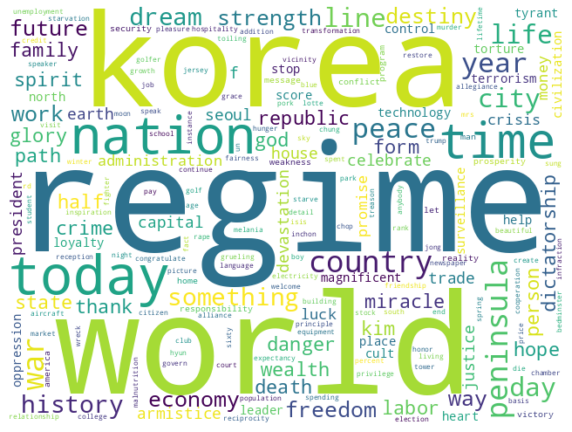

In [103]:
wcimg = WordCloud(background_color='white', width=640, height=480).generate_from_frequencies(wc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation='bilinear')
plt.axis('off')

In [105]:
# 마스크를 이용한 워드클라우드
# pip install install image
# pip install pillow

In [110]:
import numpy as np
from PIL import Image

(-0.5, 1199.5, 1095.5, -0.5)

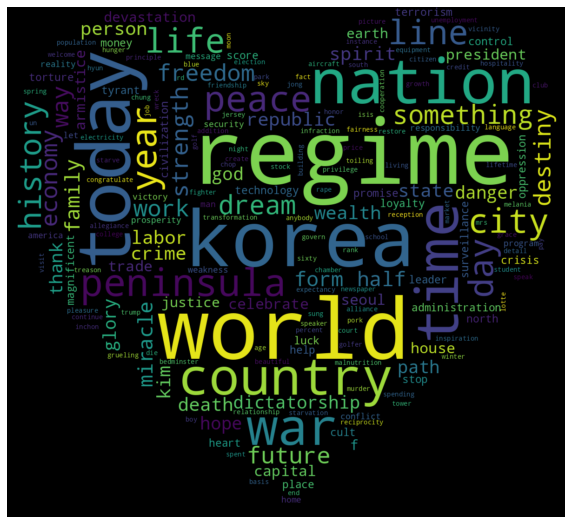

In [114]:
# 이미지 파일의 픽셀들을 numpy배열로 생성
mask_path= 'img/h.jpg'
mask = np.array(Image.open(mask_path))

wcimg = WordCloud(background_color='black', mask=mask).generate_from_frequencies(wc)
plt.figure(figsize=(10,10))
plt.imshow(wcimg, interpolation='bilinear')
plt.axis('off')

In [115]:
# 스티브잡스 스탠포드대 연설문을 시각화